In [3]:
import pandas as pd

In [4]:
data_dir = '../data/input/raw/'
reviews = pd.read_csv(data_dir + 'winemag-data_first150k.csv', index_col=0)
reviews.head(3)

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley


# province(生産地)のvalue_countsの上位10個を割合で表示

<AxesSubplot:>

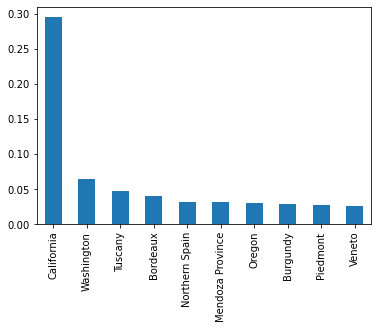

In [6]:
(reviews['province'].value_counts().head(10) / len(reviews)).plot.bar()

<AxesSubplot:>

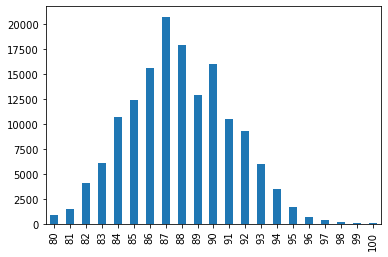

In [8]:
reviews['points'].value_counts().sort_index().plot.bar()

<AxesSubplot:ylabel='Frequency'>

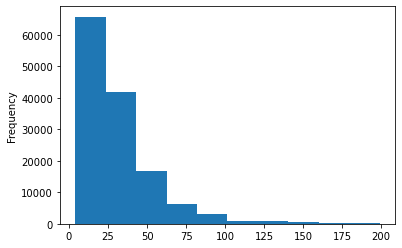

In [10]:
reviews[reviews['price'] < 200]['price'].plot.hist()

# 2変数間のグラフ

<AxesSubplot:xlabel='price', ylabel='points'>

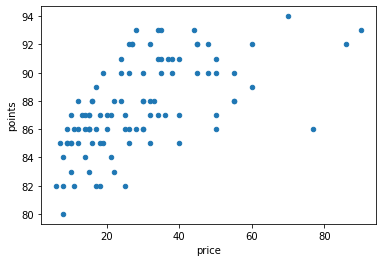

In [11]:
reviews[reviews['price'] < 100].sample(100).plot.scatter(x='price', y='points')

<AxesSubplot:xlabel='price', ylabel='points'>

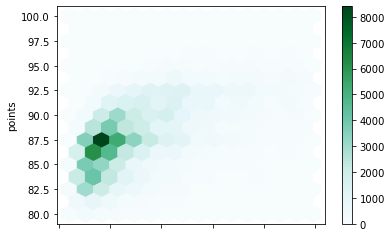

In [12]:
reviews[reviews['price'] < 100].plot.hexbin(x='price', y='points', gridsize=15)

<AxesSubplot:xlabel='price', ylabel='points'>

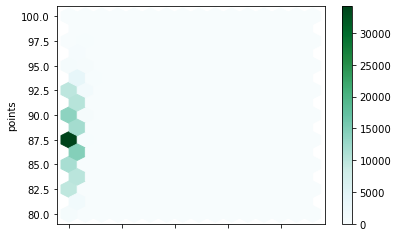

In [13]:
reviews.plot.hexbin(x='price', y='points', gridsize=15)

# 図の細かい調整

<AxesSubplot:>

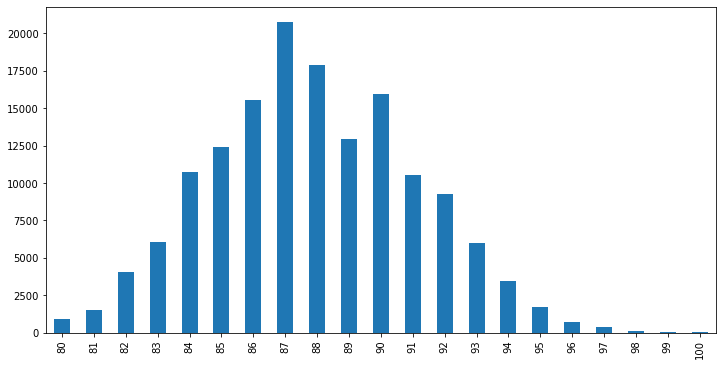

In [15]:
reviews['points'].value_counts().sort_index().plot.bar(figsize=(12, 6))

<AxesSubplot:>

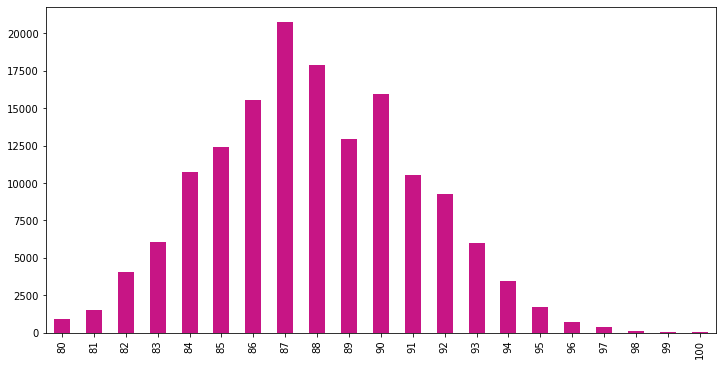

In [16]:
reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6), color='mediumvioletred')

<AxesSubplot:title={'center':'Rankings Given by Wine'}>

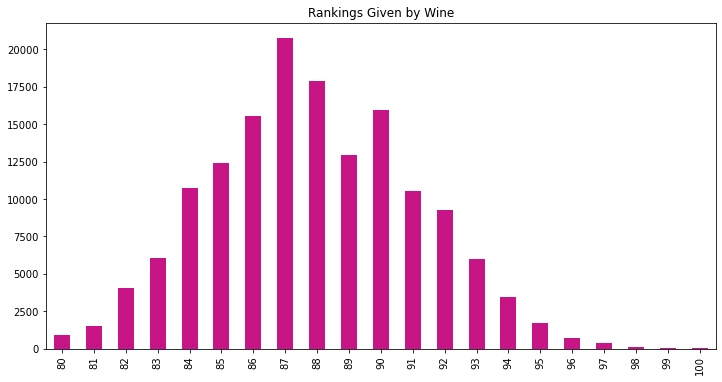

In [17]:
reviews['points'].value_counts().sort_index().plot.bar(
    figsize=(12, 6), color='mediumvioletred', title='Rankings Given by Wine Magazine')

In [1]:
# import matplotlib.pyplot as plt
# ax = reviews['points'].value_counts().sort_index().plot.bar(
#     figsize=(12, 6), color='mediumvioletred').ax.set_title()

NameError: name 'reviews' is not defined

# 後半

# サブプロット

In [5]:
import matplotlib.pyplot as plt

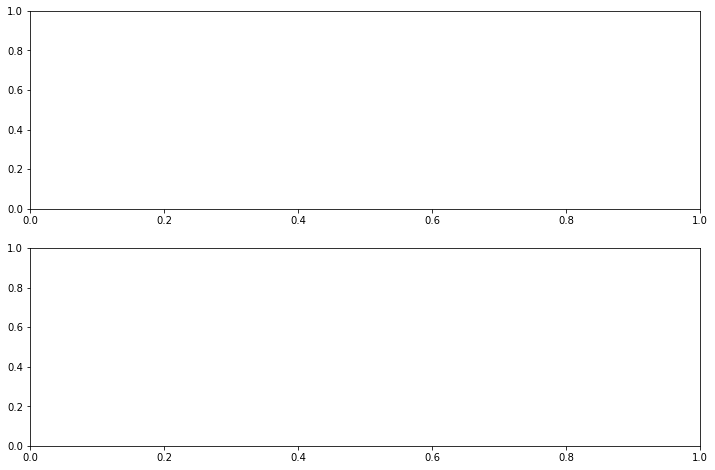

In [8]:
# 2行1列の図
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))

<AxesSubplot:>

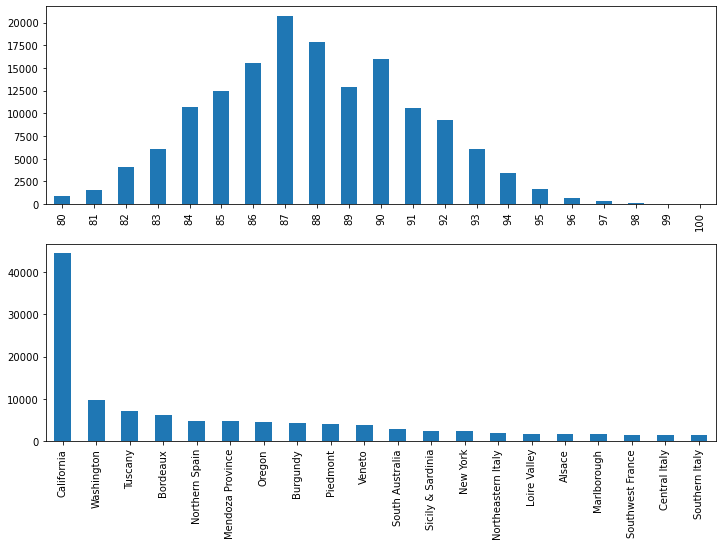

In [10]:
fig, axarr = plt.subplots(2, 1, figsize=(12, 8))
reviews['points'].value_counts().sort_index().plot.bar(ax=axarr[0])
reviews['province'].value_counts().head(20).plot.bar(ax=axarr[1])

<AxesSubplot:>

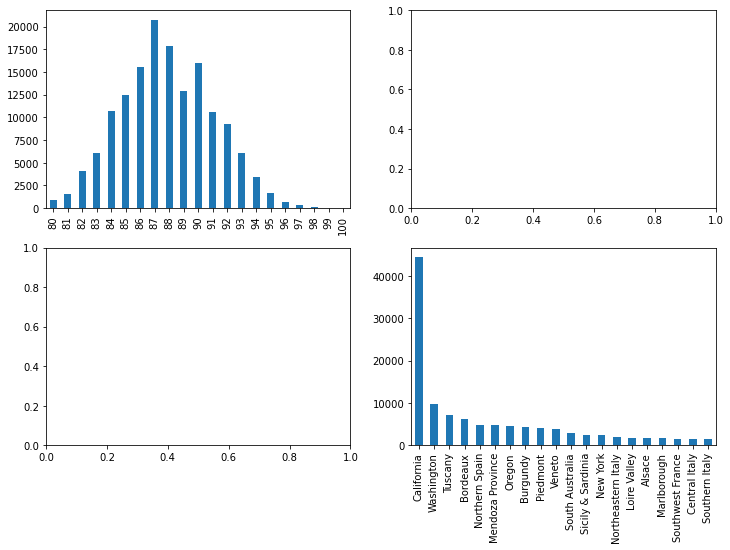

In [11]:
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))
reviews['points'].value_counts().sort_index().plot.bar(ax=axarr[0][0])
reviews['province'].value_counts().head(20).plot.bar(ax=axarr[1][1])

# seaborn

In [12]:
import seaborn as sns

<AxesSubplot:xlabel='points', ylabel='count'>

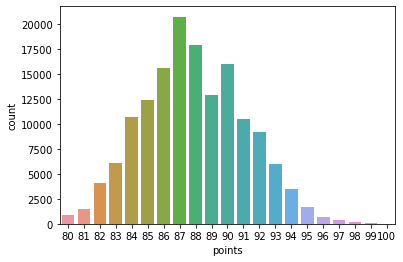

In [13]:
sns.countplot(reviews['points'])

## KDE Plot
カーネル密度関数 kernel density estimate

データを平滑化するための手法

折れ線が急に上下する原因の異常値を検知し、除外してくれる

<AxesSubplot:>

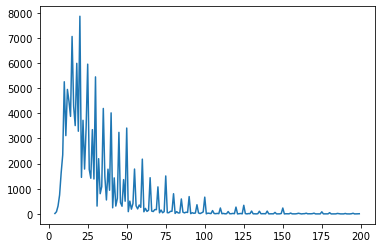

In [14]:
reviews[reviews['price'] < 200]['price'].value_counts().sort_index().plot.line()

<AxesSubplot:>

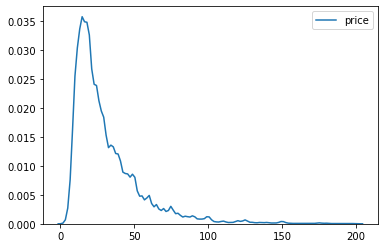

In [15]:
sns.kdeplot(reviews.query('price < 200').price)

## KDE散布図

C:\Users\yuki\Anaconda3\lib\site-packages\seaborn\distributions.py:690: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)


<AxesSubplot:>

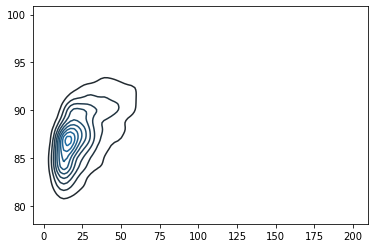

In [16]:
sns.kdeplot(reviews[reviews['price'] < 200].loc[:, ['price', 'points']].dropna().sample(5000))

<AxesSubplot:xlabel='points'>

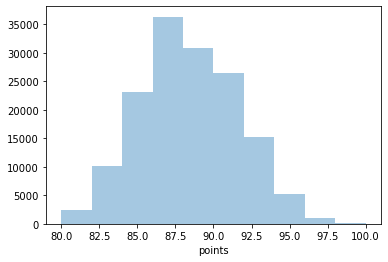

In [18]:
sns.distplot(reviews['points'], bins=10, kde=False)

<AxesSubplot:xlabel='points'>

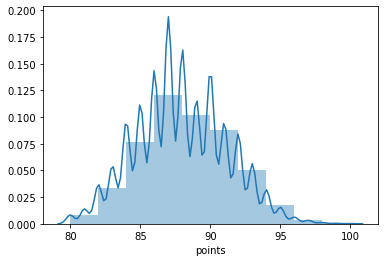

In [19]:
sns.distplot(reviews['points'], bins=10, kde=True)

## 2変量相関係数

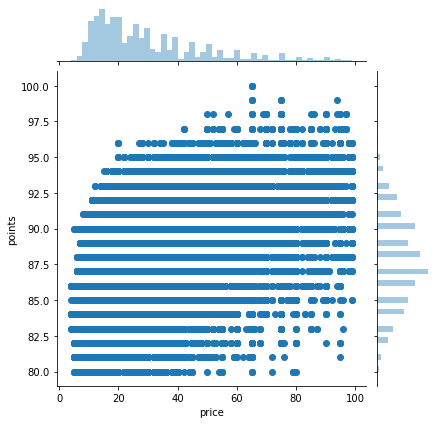

In [20]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100])

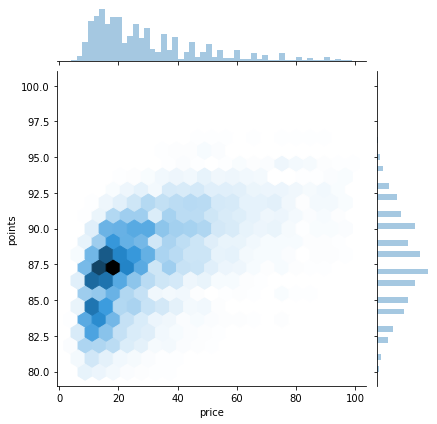

In [21]:
sns.jointplot(x='price', y='points', data=reviews[reviews['price'] < 100], kind='hex', gridsize=20)

<AxesSubplot:xlabel='variety', ylabel='points'>

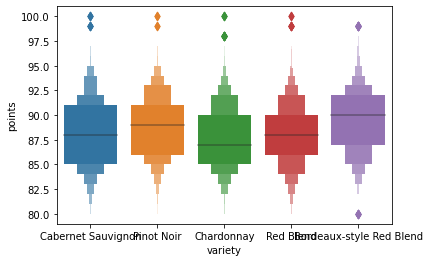

In [22]:
df = reviews[reviews.variety.isin(reviews.variety.value_counts().head(5).index)]
sns.boxenplot(x='variety', y='points', data=df)

<AxesSubplot:xlabel='variety', ylabel='points'>

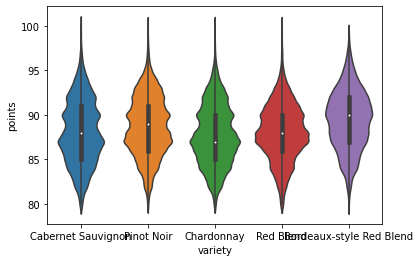

In [23]:
sns.violinplot(x='variety', y='points', data=reviews[reviews.variety.isin(reviews.variety.value_counts()[:5].index)])

# ファセット　複数変数

In [26]:
footballers = pd.read_csv('../data/input/raw/top250-00-19.csv')
footballers

,Name,Position,Age,Team_from,League_from,Team_to,League_to,Season,Market_value,Transfer_fee
0,Luís Figo,Right Winger,27,FC Barcelona,LaLiga,Real Madrid,LaLiga,2000-2001,NaN,60000000
1,Hernán Crespo,Centre-Forward,25,Parma,Serie A,Lazio,Serie A,2000-2001,NaN,56810000
2,Marc Overmars,Left Winger,27,Arsenal,Premier League,FC Barcelona,LaLiga,2000-2001,NaN,40000000
3,Gabriel Batistuta,Centre-Forward,31,Fiorentina,Serie A,AS Roma,Serie A,2000-2001,NaN,36150000
4,Nicolas Anelka,Centre-Forward,21,Real Madrid,LaLiga,Paris SG,Ligue 1,2000-2001,NaN,34500000
...,...,...,...,...,...,...,...,...,...,...
4695,Jasmin Kurtic,Attacking Midfield,29,Atalanta,Serie A,SPAL,Serie A,2018-2019,5000000.0,4800000
4696,Tchê Tchê,Central Midfield,25,Palmeiras,Série A,Dynamo Kyiv,Premier Liga,2018-2019,3000000.0,4800000
4697,Silvan Widmer,Right-Back,25,Udinese Calcio,Serie A,FC Basel,Super League,2018-2019,8500000.0,4500000
4698,Yuya Osako,Second Striker,28,1. FC Köln,2.Bundesliga,Werder Bremen,1.Bundesliga,2018-2019,4500000.0,4500000


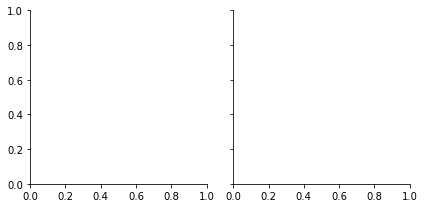

In [28]:
df = footballers[footballers['Position'].isin(['Forward', 'Goalkeeper'])]
g = sns.FacetGrid(df, col='Position')

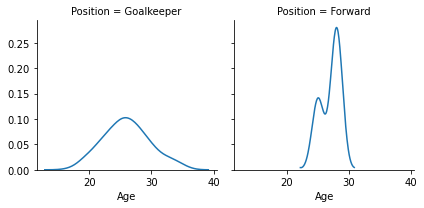

In [31]:
df = footballers[footballers['Position'].isin(['Forward', 'Goalkeeper'])]
g = sns.FacetGrid(df, col='Position')
g.map(sns.kdeplot, 'Age')

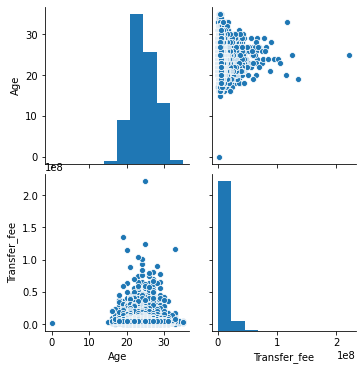

In [32]:
sns.pairplot(footballers[['Age', 'Transfer_fee']])

# 多変量プロット

In [33]:
import seaborn as sns

In [34]:
sns.lmplot(x='Value', y='Age', hue='Position', 
           data=footballers.loc[footballers['Position'].isin(['Forward', 'Right Winger', 'Left Winger'])],
          fit_reg=False)

KeyError: "['Value'] not in index"

<AxesSubplot:>

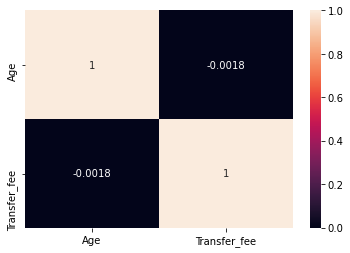

In [37]:
f = (footballers.loc[:, ['Age', 'Transfer_fee']]
#      .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
     .dropna()).corr()
sns.heatmap(f, annot=True)

## 平行座標

In [36]:
from pandas.plotting import parallel_coordinates

IndexError: list index out of range

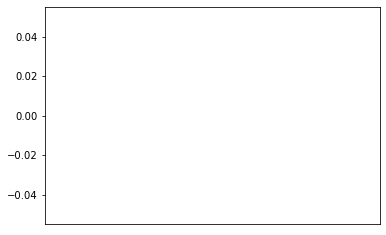

In [39]:
f = (footballers.iloc[:, 12:17]
     .loc[footballers['Position'].isin(['Forward', 'Goalkeeper'])]
#     .applymap(lambda v: int(v) if str.isdecimal(v) else np.nan)
     .dropna())
f['Position'] = footballers['Position']
# f = f.sample(200)
parallel_coordinates(f, 'Position')